In [ ]:
# 목표: 로지스틱 회귀 알고리즘을 배우고 이진분류 문제에서 클래스 확률을 예측한다

# 확률 예측하기
~~ 일 확률은?

In [ ]:
# ★생선의 길이, 높이, 두께, 대각선, 무게 를 사용하여 생선의 종류를 예측가능?★
#  - 7가지의 생선
#  - 생선의 길이, 높이, 두께, 대각선, 무게 정보가 주어졌을때, 7개의 생선에 대한 '확률' 로 출력하기.


In [ ]:
# 아이디어] KNN 은 주변의 이웃을 찾아주니까, 이웃의 클래스 비율을 확률로 삼아도 될까?


In [ ]:
# 위와 같이 이웃의 개수로 확률 삼으면 굉장히 쉽게 계산할수 있을거 같다.
# KNN Classifier 도 동일한 방식으로 클래스 확률을 계산합니다


## 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
base_path = r'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'

In [3]:
fish_df = pd.read_csv(os.path.join(base_path, 'fish.csv'))

fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
# 생선은 총 7종류 였다
fish_df.Species.unique()


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
# target : Species
# input : 나머지 5개 컬럼


In [5]:
fish_df.columns # 컬럼들 확인

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [6]:
# 입력데이터 만들기!
# Species 컬럼을 빼고 나머지 5개 컬럼 선택하기

                  # ↓TODO
fish_input = fish_df[[ 'Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [7]:
# target 데이터 만들기
fish_target = fish_df['Species'].to_numpy()
fish_target



array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [8]:
# train / test 세트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [9]:
train_input.shape, test_input.shape

((119, 5), (40, 5))

In [10]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [11]:
# 확인: 훈련 데이터 원본
train_input[:10]


array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [500.    ,  45.    ,  48.    ,   6.96  ,   4.896 ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [110.    ,  22.    ,  23.5   ,   5.5225,   3.995 ],
       [140.    ,  20.7   ,  23.2   ,   8.5376,   3.2944],
       [ 69.    ,  18.2   ,  20.3   ,   5.2983,   2.8217],
       [110.    ,  21.    ,  22.5   ,   5.6925,   3.555 ],
       [620.    ,  34.5   ,  39.7   ,  15.5227,   5.2801],
       [130.    ,  21.3   ,  22.8   ,   6.384 ,   3.534 ],
       [ 85.    ,  20.    ,  21.    ,   5.082 ,   2.772 ]])

In [12]:
# 확인: scale 된 훈련 데이터
train_scaled[:10]


array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ],
       [-0.9127463 , -0.96490079, -0.95281644, -0.88017186, -0.99153566],
       [-0.79734143, -0.70251203, -0.76172762, -0.78282455, -0.54453018],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [-0.74104638, -0.67439895, -0.73567006, -0.61205928, -0.55733138],
       [-0.86771025, -0.7962223 , -0.89201546, -0.93358694, -1.02183182]])

## KNN classifier 의 확률예측

In [ ]:
# ↓ KNN 이웃 개수 k 를 3으로 지정하여 사용하겠습니다

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)  # target 값이 '문자열' 타입인데, 학습이 된다!

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


## 다중 분류 (multi-class classification)
target 데이터에 2개 이상의 클래스가 포함된 분류 문제

※ vs. '이진분류 (binary classification)'

In [ ]:
# 이번 분류문제의 target 값에는 7가지의 생성 Species 가 있다.
# 이렇게 target 데이터에 2개 이상의 클래스가 포함된 분류 문제를 '다중분류' 라고 부른다

# ※ vs. '이진분류 (binary classification)'

In [ ]:
# 이진분류때에는  각 클래스를 1, 0  으로 지정하여 target 데이터를 만들었었습니다.
# 다중분류에서도 target 값을 숫자로 바꾸어 입력할수 있지만,
# ★사이킷런에서는 편리하게도 '문자열로 된 target 값'을 그대로 사용할수 있다.

# 주의사항! : target값을 문자열로 사이킷럿 모델에 전달하면 '순서' 가 자동으로 알파벳순으로 정렬됨.


In [14]:
# 원본 데이터의 target값 순서 확인
pd.unique(fish_df['Species'])


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [15]:
# KNeighborsClassifiers에서 정렬된 target 값 확인
kn.classes_


array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [16]:
# 처음 5개 샘플의 target 값을 예측.  예측값으로 문자열 그대로 출력
kn.predict(test_scaled[:5])


array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [17]:
# 실제 값
test_target[:5]


array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [ ]:
# 5개 샘플의 예측은 어떤 확률로 만들어 졌을까?
# 클래스별 확률값 확인 => predict_proba()   :  사이킷런 '분류'모델에 있는 메소드


In [18]:
# test 세트에 있는 첫 5개 샘플에 대한 확률 출력
proba = kn.predict_proba(test_scaled[:5])

print(kn.classes_)

print(np.round(proba, decimals=4))


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
"""
↓ 각 클래스별 확률

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]  <=  첫번째 샘플 (합하면 1)
 [0.     0.     0.     0.     0.     1.     0.    ]  <=  두번째 샘플
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]  <=  네번째 샘플
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
"""
None

In [19]:
# 네번째 샘플의 KNN 이웃의 클래스 확인해보자.   가장 가까운 이웃의 비율과 맞을까?

test_scaled[3:4]


array([[-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464]])

In [20]:
distances, indexes = kn.kneighbors(test_scaled[3:4])

print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 다중분류에서 KNN 의 약점

In [ ]:
# 확률값을 잘 예측하긴 했지만.

# 문제점..
# '딱 3개의 이웃' 을 사용...
# 0/3, 1/3, 2/3, 3/3 <= 가능한 확률은 이게 전부 다?

# ↑ 바로 이게 KNN Classifier 가 '다중분류' 에서 가지는 약점.



# 로지스틱 회귀 (Logistic Regression)

- 이름은 회귀이지만 **분류 모델** 입니다
- 선형 방정식을 학습

In [ ]:
# 선형회귀(Linear Regression) 와 동일하게 선형 방정식을 학습

# 예)
#  z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Width) + f

#     ↑  a, b, c, d, e 는 '가중치' 혹은 '계수

#  z 는 어떤 값도 가능.
#     ★하지만! '확률'이 되려면 0 ~ 1 (또는 0 ~ 100%) 사이 값이 되어야 한다.

#    => 시그모이드 함수 (sigmoid function) 또는 로지스틱 함수 (logistic function) 사용!



### 시그모이드 함수 (sigmoid function)
![](https://media.licdn.com/dms/image/D4D12AQGIXdSG7IJCNw/article-cover_image-shrink_600_2000/0/1694183259537?e=2147483647&v=beta&t=OtnfeqwCtKTSVrdKZdyOzNYECyLLZuEUIxkTfTQ0dS0)


선형방정식의 출력 z 의 음수를 사용해 자연상수 e 를 거듭제곱 하고 1을 더한 값의 역수

바로 위와 같은 그래프를 만들기 위한 함수다!

z 가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고

z 가 무한하게 큰 양수가 될때 이 함수는 1에 가까워진다

z 가 0 이 될때는 0.5 가 된다.

z 가 어떤 값이 되더라도 $\phi$ (phi) 는 절대로 0 ~ 1 사이의 범위를 벗어날수 없습니다.

In [ ]:
# 시그모이드 함수의 동작을 시각화 해보자!
# -5 ~ +5 사이에  0.1 간격으로 만든 배열 z 를 만든 다음 z 위치마다 시그모이드 함수를 계산합니다

# 지수 함수 계산은 np.exp() 함수 사용

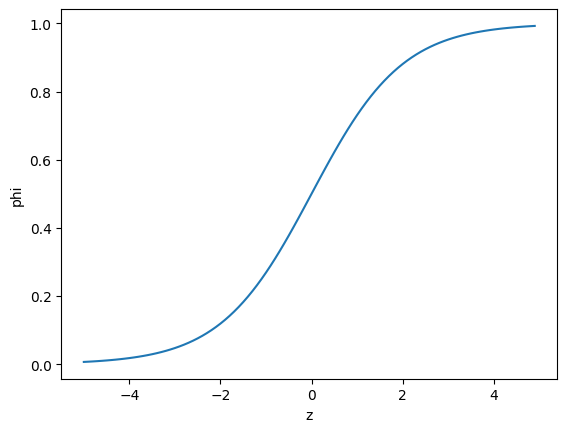

In [21]:
# 시그모이드 함수의 동작을 시각화
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [ ]:
# 이진분류일 경우
# 시그모이드 함수의 출력이 0.5 보다 크면 양성 클래스, 0.5 보다 작으면 음성 클래스로 판단

# ↓ 도미와 빙어 2개를 사용하여 이진 분류를 수행해보겠습니다

# ※ 정확히 0.5인 경우 사이킷런은 음성 클래스로 판단합니다


In [22]:
# boolean indexing
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])


['A' 'C']


In [23]:
# boolean indexing 을 사용하여
# train 세트에서 도미 (Bream) 와 빙어 (Smelt) 의 행만 골라내겠습니다.

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')


In [24]:
# 도미 + 빙어 => 33
np.sum(bream_smelt_indexes)


np.int64(33)

In [25]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
train_bream_smelt.shape

(33, 5)

In [26]:
target_bream_smelt = train_target[bream_smelt_indexes]
target_bream_smelt.shape

(33,)

In [27]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

```python
class sklearn.linear_model.LogisticRegression(
  penalty='l2',
  *,
  dual=False,
  tol=0.0001,
  C=1.0,
  fit_intercept=True,
  intercept_scaling=1,
  class_weight=None,
  random_state=None,
  solver='lbfgs',
  max_iter=100,
  multi_class='deprecated',
  verbose=0,
  warm_start=False,
  n_jobs=None,
  l1_ratio=None)
```

In [28]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)


LogisticRegression()

In [29]:
# 훈련한 모델을 사용하여  train_bream_smelt 에 있는 첫 5개 샘플을 예측해보자

print(lr.predict(train_bream_smelt[:5]))


['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [30]:
# <- 실제 target 값과 비교해보자
target_bream_smelt[:5]


array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
# 첫 5개 샘플의 예측확률 . <- predict_proba() 사용

In [31]:
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))


['Bream' 'Smelt']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [ ]:
"""
['Bream' 'Smelt']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
"""
None

In [32]:
# 로지스틱 회귀가 학습한 계수를 확인
print(lr.coef_, lr.intercept_)


[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [ ]:
#  이 로지스틱 회귀 모델이 학습한 방적식
# z = -0.404 x (Weight) - 0.576 x (Length)
#      - 0.663 x (Diagonal) - 1.013 x (Height) - 0.732 x (Width) - 2.161

# LogisticRegression 은 z값을 계산하는 함수 제공 -> decision_function()


In [33]:
# 처음 5개 샘플의 z 값을 출력해보자
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)


[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [ ]:
# 위 z 값을 시그모이드 함수 통과 시키면 '확률' 값 얻을수 있다

# 파이썬의 scipy 라이브러리에 시그모이드 함수가 있다. => expit()
# np.exp()  함수를 사용해 분수 계산하는 것보다 훨씬 편리하고 안전.



In [34]:
from scipy.special import expit

print(expit(decisions))


[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [ ]:
"""
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

이진분류 문제에서 decision_function() 은 '양성 클래스' 에 대한 z 값을 리턴하는 것이다

['Bream' 'Smelt']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
"""
None

### 로지스틱 회귀로 다중분류 수행하기

#### max_iter, L2 규제, C

In [ ]:
# 7개의 생선. 다중분류 .
# 이진분류 때와의 차이점

# LogisticRegression 은 기본적으로 '반복 알고리즘' 사용
# max_iter=  로 '반복 횟수' 지정. (기본값 100)

# 릿지 회귀 와 마찬자기로 '계수의 제곱을 규제' => 'L2 규제' 라고 함.
#  C= 매개변수로 규제 제어함.
#     릿지회귀의 alpha= 와 달리, C값은 작을수록 규제가 커집니다. (기본값 1)


In [ ]:
# 7가지 생선 데이터가 모두 들어있는 train_scaled 와 train_target 을 사용합니다

In [35]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [36]:
# 테스트 세트의 처음 5개 샘플에 대한 예측을 출력
print(lr.predict(test_scaled[:5]))


['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [37]:
# 실제 target 값과 비교해보세요
test_target[:5]


array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [38]:
# 5개 샘플에 대한 예측 확률
proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
"""
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]  <- 첫번째 샘플
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
"""
None

In [40]:
# 다중 분류일 경우 선형 방정식의 모습 확인
lr.coef_   # 7개의 클래스 x 5개의 특성


array([[-1.50605455, -1.03747913,  2.60919713,  7.6942274 , -1.18603342],
       [ 0.19200046, -1.99988812, -3.79617725,  6.5031264 , -2.00022754],
       [ 3.55793539,  6.36988929, -8.52233732, -5.75397233,  3.79233438],
       [-0.11453309,  3.61060121,  3.94464503, -3.62243904, -1.75981679],
       [-1.40843717, -6.09242191,  5.28629633, -0.86696569,  1.84518455],
       [-1.33419949,  1.48153392,  1.38217547, -5.6602348 , -4.39228964],
       [ 0.61328846, -2.33223526, -0.90379939,  1.70625807,  3.70084846]])

In [41]:
lr.intercept_ # 절편도 7개의 클래스


array([-0.10345047, -0.27281217,  3.24444852, -0.17565069,  2.64960025,
       -6.7204285 ,  1.37829306])

In [42]:
print(lr.coef_.shape, lr.intercept_.shape)


(7, 5) (7,)


In [ ]:
# ↑ 이진분류에서 보았던 z 를 7 개를 계산한다!    (이진분류 때는 양성클래스에 대해서만 계산했었다)
# 다중분류에서는 클래스마다 z값 계산!
# 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 된다


### 소프트맥스 (softmax)

In [ ]:
# 예측확률은 어떻게 계산?
# 이진분류 에서는 -> 시그모이드 함수 사용  z 를 0 ~ 1사이로 변환
# 다중분류 에서는 -> 소프트맥스 함수 사용  7개(클래스개수)의 z 값을 확률로 변환

# 소프트맥스 함수는
#     - 여러개의 선형방정식의 출력값을 0 ~ 1 사이로 압축하고,
#     - 전체 합이 1이 되도록 만듭니다.

#   이를 위해 지수함수를 사용하기 때문에 '정규화된 지수함수' 라고도 부릅니다.


#### 소프트맥스의 계산 방식

7개의 z 값의 이름을 $z1$ ~ $z7$ 이라고 하자.

$z1$ ~ $z7$ 까지 값을 사용해 지수함수  $e^{z1}$ ~ $e^{z7}$ 을 계산해 모두 더합니다

이를 $\text{e_sum}$ 이라 하겠습니다
<br><br>
$\text{e_sum} =  e^{z1} + e^{z2} + e^{z3} + e^{z4} + e^{z5} + e^{z6} + e^{z7}$
<br><br>

In [ ]:
# 소프트맥스의 계산 방식
"""
소프트맥스의 계산 방식도 어렵지 않습니다


7개의 z 값의 이름을 z1 ~ z7 이라고 하자.
z1 ~ z7 까지 값을 사용해 지수함수  e^z1 ~ e^z7 을 계산해 모두 더합니다
이를 e_sum 이라 하겠습니다

    e_sum =  e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7

그 다음 e^z1 ~ e^z7 을 각각 e_sum 으로 나누어 주면 됩니다

           e^z1           e^z2                  e^z7
    s1 =  ──────  , s2 =  ──────  , ... , s7 =  ──────
           e_sum          e_sum                 e_sum


    s1 에서 s7 까지 모두 더하면 1이 됩니다.  7개 생선에 대한 확률의 합은 1이 되는 겁니다.

"""
None



In [ ]:
# 시그모이드 함수와 소프트맥스 함수는 사이킷런에서는 자동으로 계산해주지만
# 이 두 함수는 나중에 '신경망'을 배울때 또 등장합니다.

# 여기서 계산방식을 익혀 두면 나중에 신경망을 배울 때 훨씬 잘 이해 할수 있을겁니다

In [ ]:
# decision_function() 으로 z1 ~ z7 까지 값을 구하고
# 소프트맥스 함수를 사용해 확률로 바꾸어 보자

In [43]:
decision = lr.decision_function(test_scaled[:5])  # 5개 샘플 x 7개 클래스에 대한 방정식 값
print(lr.classes_)
print(np.round(decision, decimals=2))


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [44]:
# scipy 는 소프트맥스 함수도 제공합니다
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))


[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [45]:
# 각 클래스별 확률을 모~두 합하면 1이다!
np.sum(proba, axis=1)


array([1., 1., 1., 1., 1.])

## 로지스틱 회귀로 확률 예측  
문제 해결과정

1. 생선의 여러 특성값을 통해 어떤 생선인지 예측 '확률' 구하는 문제
1. KNN 이웃 모델의 문제
    1. 확률을 출력할수는 있지만 이웃한 샘플의 클래스 비율이 항상 정해진 확률만 출력
1. 이를 위해 로지스틱회귀  분류 알고리즘 사용  (분류모델 이다!)
    1. 선형회귀처럼 선형방정식 사용
    1. 그러나 계산한 값 그대로 출력하는게 아니라 0 ~ 1 사이로 압축 (즉 0%~100% 사이)
    1. 이진분류에서는 하나의 선형방정식을 훈련함
        1. 이 방정식의 출력값을 시그모이드 함수에 통과시켜 0 ~ 1 사이의 값 만듬 (이것은 양성클래스의 확률)
        1. 1 에서 위 양성클래스 확률을 빼면 음성클래스 확률 값이다
        
    1. 다중분류의 경우 클래스 개수만큼 방정식을 훈련
        1. 그 다음 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체클래스에 대한 합이 항상 1이 되도록 만듬
        1. 이 값을 각 클래스에 대해 확률로 이해할 수 있습니다.